In [1]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

f = h5py.File("Galaxy10_DECals.h5")
images = f.get("images")
labels = f.get("ans")

In [19]:
indices = list(range(0, len(images), 35))
imgs = np.array(images[indices])
lab = np.array(labels[indices])

In [50]:
from PIL import Image

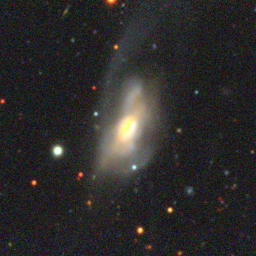

In [67]:
Image.fromarray(imgs[10])

In [31]:
# splitting data for test set
X = imgs
X = X.reshape(len(imgs), -1) 
y = lab

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, random_state=10)

### 3.2

In [46]:
# PCA followed by logistic regression
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

# Write your implementation below
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(scale(X_train))

log = LogisticRegression(max_iter=10000)
log.fit(X_train_pca, Y_train)

LogisticRegression(max_iter=10000)

#### Training Error

In [47]:
Y_train_pred = log.predict(X_train_pca)

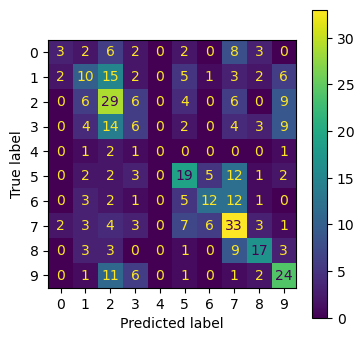

In [48]:
conf_mat = confusion_matrix(y_true=Y_train, y_pred=Y_train_pred)
conf_mat

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(Y_train))
conf_mat_disp.plot()

plt.gcf().set_size_inches(4, 4)

In [49]:
accuracy_score(y_true=Y_train, y_pred=Y_train_pred)

0.37777777777777777

#### Validation Error

In [158]:
X_val_pca = pca.fit_transform(scale(X_val))
Y_val_pred = log.predict(X_val_pca)

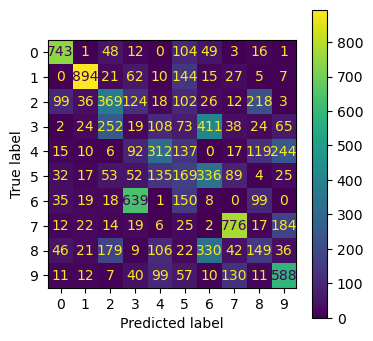

In [159]:
conf_mat = confusion_matrix(y_true=Y_val, y_pred=Y_val_pred)
conf_mat

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(Y_val))
conf_mat_disp.plot()

plt.gcf().set_size_inches(4, 4)

In [164]:
accuracy_score(y_true=Y_val, y_pred=Y_val_pred)

0.4027

#### Test Error

In [165]:
X_test_pca = pca.fit_transform(scale(X_test))
Y_test_pred = log.predict(X_test_pca)

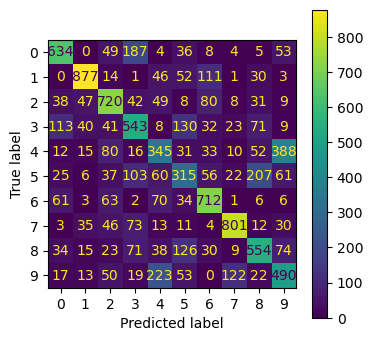

In [166]:
conf_mat = confusion_matrix(y_true=Y_test, y_pred=Y_test_pred)
conf_mat

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(Y_test))
conf_mat_disp.plot()

plt.gcf().set_size_inches(4, 4)

In [168]:
accuracy_score(y_true=Y_test, y_pred=Y_test_pred)

0.5991

### 3.3

In [34]:
# select number of components

num_components = np.arange(1, 50, 1)

# Write your implementation below
pca = PCA()
X_train_pca = pca.fit_transform(scale(X_train))
X_val_pca = pca.fit_transform(scale(X_val))
scores = []

for n in num_components:
    print(n)
    log = LogisticRegression(max_iter=10000)
    log.fit(X_train_pca[:, :n], Y_train)    
    Y_val_pred = log.predict(X_val_pca[:, :n])
    acc = accuracy_score(y_true=Y_val, y_pred=Y_val_pred)
    
    scores.append(acc)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


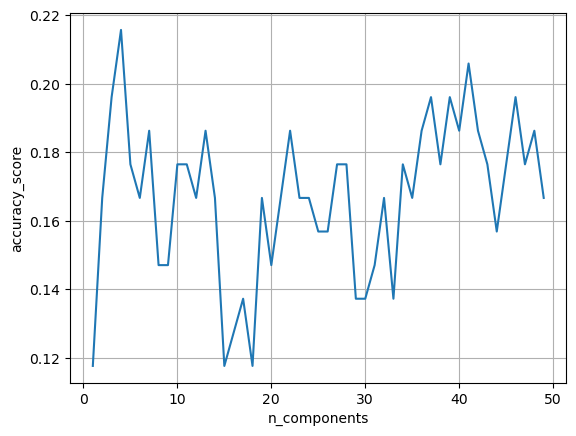

In [35]:
plt.plot(num_components, scores)
plt.xlabel('n_components')
plt.ylabel('accuracy_score')
plt.grid()